### Importing Libraries

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
data = pd.read_csv("day.csv")

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-18,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-18,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-18,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-18,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-18,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.shape

(730, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data Cleaning

### Dropping Irrelevent Columns

In [6]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
data = data.drop(["instant"], axis = 1)

In [8]:
data = data.drop(['casual'] , axis = 1)

In [9]:
data = data.drop(['registered'] , axis = 1)

In [10]:
data.shape

(730, 13)

### Checking Null Values

In [11]:
data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### Converting Dteday Column To Date Datatype

In [12]:
data["dteday"] =   pd.to_datetime(data["dteday"])

In [13]:
data["dteday"].dtype

dtype('<M8[ns]')

In [14]:
data["dteday"].dt.year.unique()

array([2018, 2019], dtype=int64)

### Encoding Season Column With Categorical Values

In [15]:
data["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [16]:
#season : season (1:spring, 2:summer, 3:fall, 4:winter)

In [17]:
season = {1: 'spring', 
          2:'summer', 
          3:'fall', 
          4:'winter'}

In [18]:
data["season"] = data["season"].map(season)

In [19]:
data.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

### Encoding Year Column With Actual Year Values 

In [20]:
year = {0: 2018, 
        1: 2019}

In [21]:
data["yr"] = data["yr"].map(year)

In [22]:
data["yr"].unique()

array([2018, 2019], dtype=int64)

In [23]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-02-01,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-03-01,spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-04-01,spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-05-01,spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Encoding Month Column With Actual Months 

In [24]:
data["mnth"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [25]:
month = {1 : "Jan" , 2 : "Feb", 3 : "Mar" , 4 : " Apr" , 5 : "May" , 6 : "Jun",
         7 : "Jul", 8 : "Aug" , 9 : "Sep" , 10 : "Oct" , 11 : "Nov" , 12 : "Dec"}

In [26]:
data["mnth"] = data["mnth"].map(month)

In [27]:
data["mnth"].unique()

array(['Jan', 'Feb', 'Mar', ' Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

### Encoding Weekday Column With Actual Day Names

In [28]:
data["weekday"].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [29]:
day = {0 : "Sun" , 1 : "Mon" , 2 : "Tue" , 3 : "Wed" ,
      4 : "Thu" , 5 : "Fri", 6 : "Sat"}

In [30]:
data["weekday"] = data["weekday"].map(day)

### Encoding Weathersit Column With Actual Weather Type

In [31]:
data["weathersit"].unique()

array([2, 1, 3], dtype=int64)

In [33]:
weather = {1 : "Clear",
          2 : "Cloudy",
          3 : "Light Rain"}

In [34]:
data["weathersit"] = data["weathersit"].map(weather)

In [35]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,2018,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2018-02-01,spring,2018,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,2018-03-01,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-04-01,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-05-01,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Checking Duplicate Rows

In [36]:
data.duplicated().sum()

0

## EXPLORATORY DATA ANALYSIS

### Univariate Analysis

### 1. Year Column

In [37]:
year_count = data.groupby("yr")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)

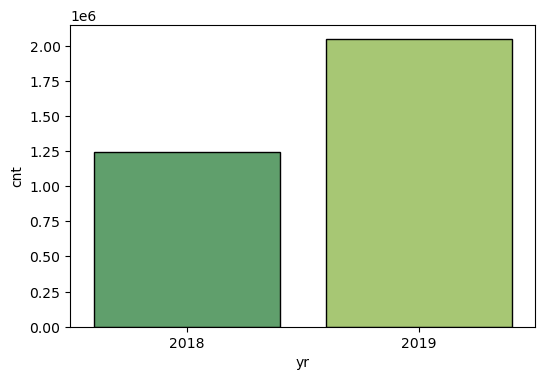

In [38]:
plt.figure(figsize = (6,4) , dpi = 100)

sns.barplot(data = year_count, x = "yr" , y = "cnt", edgecolor = "black", palette = "summer" );

In [39]:
year_count

,yr,cnt
1,2019,2047742
0,2018,1243103


In [40]:
np.round(100 * ( year_count["cnt"][1] - year_count["cnt"][0] ) / year_count["cnt"][0] , 2)

64.73

### Observation:

It can be observed that the no. of bikes rented in 2019 increased by 65% than the year 2018 which is a good sign for any business on YOY basis.

### 2. Weekday Column

In [41]:
weekday_count = data.groupby("weekday")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)

In [42]:
weekday_count

,weekday,cnt
0,Fri,487790
4,Thu,485395
2,Sat,477807
6,Wed,471214
5,Tue,469109
1,Mon,455503
3,Sun,444027


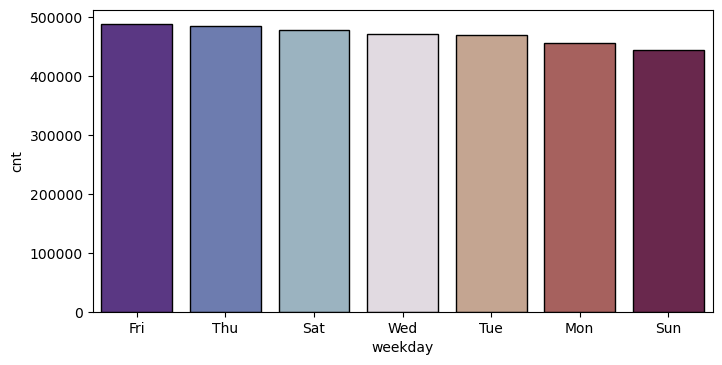

In [43]:
plt.figure(figsize = (8,4) , dpi = 100)

sns.barplot(data = weekday_count, x = "weekday" , y = "cnt", edgecolor = "black", palette = "twilight_shifted");

### Observation:

Most bikes were rented on Friday

### 3. Workday Column

In [44]:
workday_count = data.groupby("workingday")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)

In [45]:
workday_count

,workingday,cnt
1,1,2290576
0,0,1000269


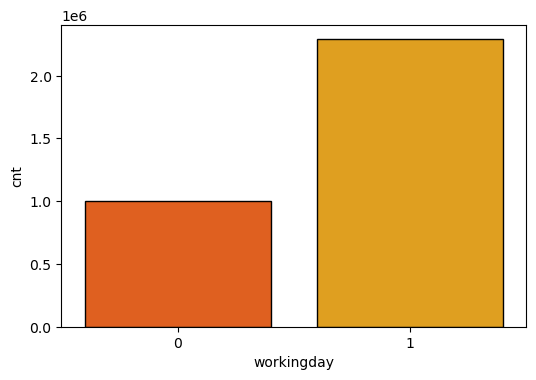

In [46]:
plt.figure(figsize = (6,4) , dpi = 100)

sns.barplot(data = workday_count, x = "workingday" , y = "cnt", edgecolor = "black", palette = "autumn" );

### Observation:

Most bikes were rented on Working days. This tells us that most people must be renting bikes to commute to their work place. And hence Th bike renting company BoomBikes makes a most of its business (more than twice) on workdays and not on holidays.

### 4. Weathersit Column

In [47]:
weathersit_count = data.groupby("weathersit")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)

In [48]:
weathersit_count

,weathersit,cnt
0,Clear,2257952
1,Cloudy,995024
2,Light Rain,37869


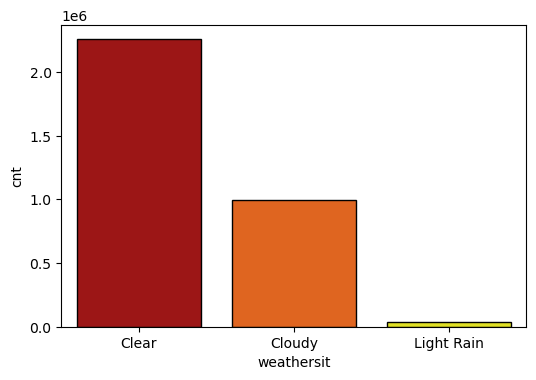

In [49]:
plt.figure(figsize = (6,4) , dpi = 100)

sns.barplot(data = weathersit_count, x = "weathersit" , y = "cnt", edgecolor = "black", palette = "hot" );

### Observation:

Clearly, from the above plot it is evident that weather situation factor contributes a lot in bike renting business. There is negligible amount of bikes rented during rain than compared to when the weather is clear.

### 5. Month Column

In [50]:
month_count = data.groupby("mnth")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)

In [51]:
month_count

,mnth,cnt
1,Aug,351194
6,Jun,346342
11,Sep,345991
5,Jul,344948
8,May,331686
10,Oct,322352
0,Apr,269094
9,Nov,254831
7,Mar,228920
2,Dec,211036


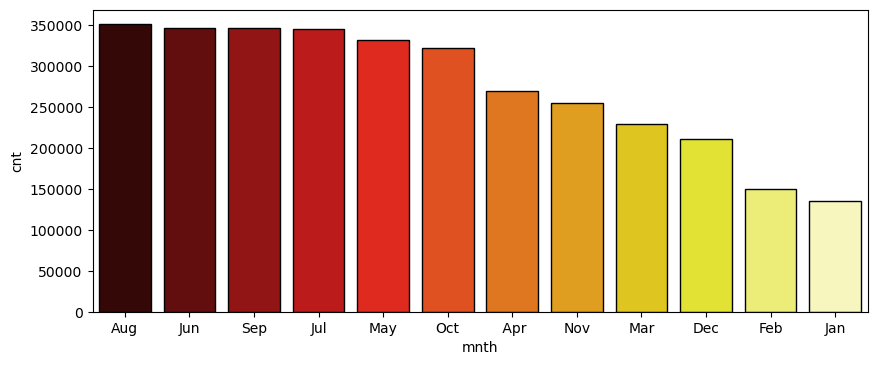

In [52]:
plt.figure(figsize = (10,4) , dpi = 100)

sns.barplot(data = month_count, x = "mnth" , y = "cnt", edgecolor = "black", palette = "hot" );

### Observation:

Most Bikes were rented in the month of August and June. 

### BIVARIATE ANALYSIS

### 1. Season Vs Temperature

In [53]:
season_count = data.groupby("season")["cnt"].sum().reset_index()

In [54]:
season_count

,season,cnt
0,fall,1061129
1,spring,469514
2,summer,918589
3,winter,841613


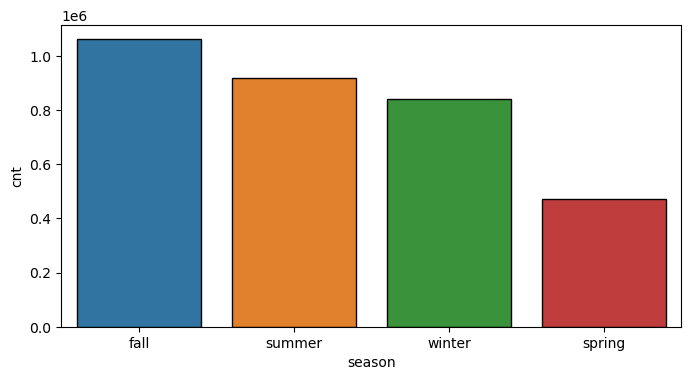

In [55]:
plt.figure(figsize = (8,4) , dpi = 100)

sns.barplot(data = season_count.sort_values(by = "cnt" , ascending = False), x = "season" , y = "cnt", edgecolor = "black" );

In [56]:
season_avg_temp = data.groupby("season")["temp"].mean().reset_index().sort_values(by = "temp" , ascending = False)

In [57]:
season_avg_temp

,season,temp
0,fall,28.958682
2,summer,22.320611
3,winter,17.339148
1,spring,12.197035


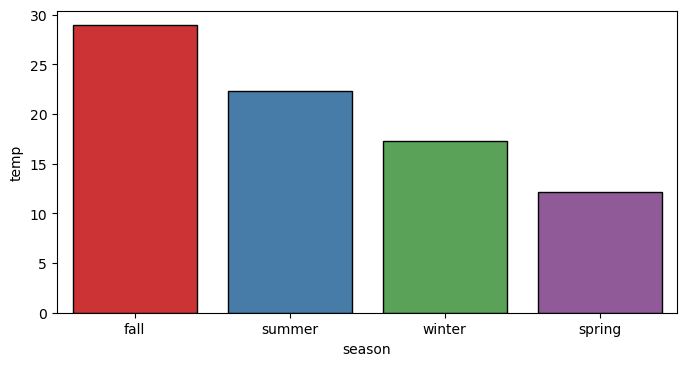

In [58]:
plt.figure(figsize = (8,4) , dpi = 100)

sns.barplot(data = season_avg_temp, x = "season" , y = "temp", edgecolor = "black", palette = "Set1" );

### 2. Season Vs Windspeed 

In [59]:
season_avg_wind = data.groupby("season")["windspeed"].mean().reset_index().sort_values(by = "windspeed" , ascending = False)

In [60]:
season_avg_wind

,season,windspeed
1,spring,14.387168
2,summer,13.634978
0,fall,11.530366
3,winter,11.523637


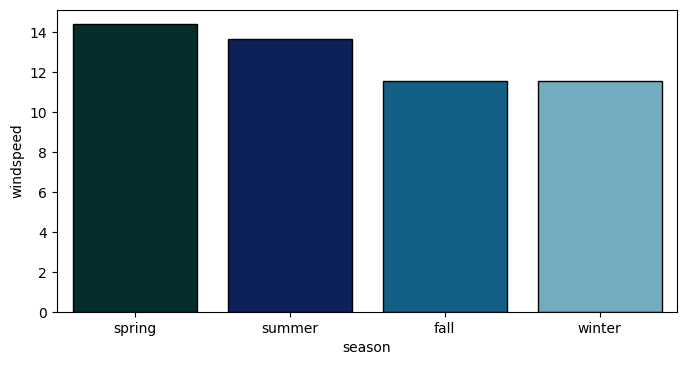

In [61]:
plt.figure(figsize = (8,4) , dpi = 100)

sns.barplot(data = season_avg_wind, x = "season" , y = "windspeed", edgecolor = "black", palette = "ocean" );

### Observation:

From the above bar plots it appears that more bikes were rented during the fall and lesser bikes were rented during the Spring. And after investigating the climatic conditions one of the reasons for this could be the average temperature is very low in spring and also the average wind speed is very high in Spring than the Fal.

### 3. Bikes Rented On Weekdays Vs Holidays

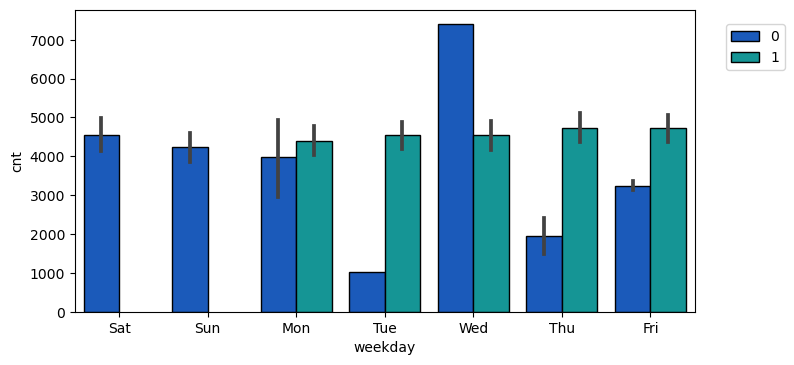

In [62]:
plt.figure(figsize = (8,4) , dpi = 100)

sns.barplot(data = data, x = "weekday" , y = "cnt", edgecolor = "black", palette = "winter", hue = "workingday" )
plt.legend(loc = (1.05, 0.8));

### Observation:

The Saturday and Sunday being non working days the count of bikes rented on these days is almost negligible for these days compared to other days. But surprisingly there is an interesting observation here, that whenever Wednesday is holiday or non working day the more number of bikes are being rented compared to when Wednesday is a working day.

## ENCODING OF CATEGORICAL VARIABLES

In [63]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,2018,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2018-02-01,spring,2018,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,2018-03-01,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-04-01,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-05-01,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [64]:
data = data.drop(["dteday"] , axis = 1)

In [65]:
data.shape

(730, 12)

In [66]:
dummy_data = pd.get_dummies(data, drop_first= True)

In [67]:
dummy_data.shape

(730, 30)

### Checking Correlation

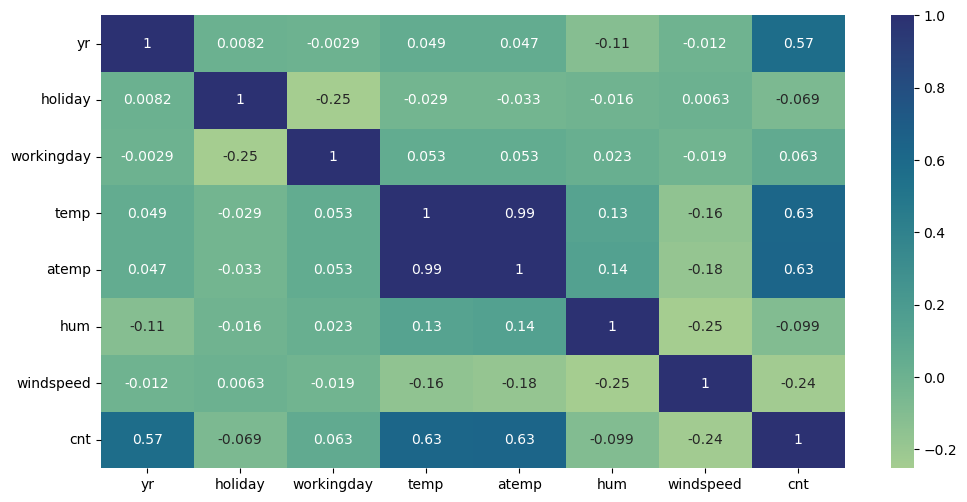

In [190]:
plt.figure(figsize = (12,6) , dpi = 100)

sns.heatmap(data.corr() , annot= True , cmap = "crest");

### Observation:

Temp and atemp columns are highly correlated and one of these needs to be dropped during feature selection.

# TRAIN TEST SPLIT

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X = dummy_data.drop("cnt" , axis = 1)

y = dummy_data["cnt"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [71]:
X_train.shape

(584, 29)

In [72]:
X_test.shape

(146, 29)

# STANDARD SCALING THE DATA

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

In [75]:
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.transform(X_test)

# MODEL BUILDING

### Model 1

**Lets build this model without doing any feature selection**

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
model1 = LinearRegression()

In [78]:
model1.fit(scaled_X_train , y_train)

LinearRegression()

In [79]:
y_pred1 = model1.predict(scaled_X_test)

In [80]:
#Evaluating the model

In [81]:
from sklearn.metrics import r2_score

In [82]:
np.round( 100 * r2_score(y_test , y_pred1) , 2 )

84.17

### Observation:

So without doing any feature selection and without dropping any feature, our model1 is giving an r2 score of 84.17%

# FEATURE SELECTION

### USING P-VALUE METHOD

So, following are our null and alternate hypothesis

**H0 = The perticular feature is not Significant for the model.**

**Ha = The perticular feature is Significant for the model.**


**Here we will use statsmodel library and check the p-value of each independent variable. The confidence interval that we are taking is 95%. Hence, the probability of error which is alpha (given by 1 - Confidence Interval) is 0.05. Hence, for feature to be considered for modeling, its p-value has to be lesser than 0.05 because only then we will be in a position to reject null hypothesis. So, for the feature, when p-value < alpha i.e 0.05 then that feature is significant for our model.**

In [84]:
import statsmodels.api as sm

### MODEL 2

#### Feature Selection using p-value method

In [90]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()

In [93]:
num_variables = ['yr','temp', 'atemp', 'hum', 'windspeed']

In [94]:
X_train[num_variables] = scaler.fit_transform(X_train[num_variables])

X_test[num_variables] = scaler.transform(X_test[num_variables])

In [95]:
import statsmodels.api as sm

In [96]:
#add_constant
X_train_sm = sm.add_constant(X_train)

In [97]:
#OLS
lr = sm.OLS(y_train , X_train_sm)

In [98]:
#fit
lr_model = lr.fit()

In [99]:
#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     110.3
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          2.45e-206
Time:                        16:19:22   Log-Likelihood:                -4695.2
No. Observations:                 584   AIC:                             9448.
Df Residuals:                     555   BIC:                             9575.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3687.6195    195.340     18.878      0.000    3303.924    4071.315
yr                     1018.0599     32.890     30.953      0.000     953.455    1082.664
holiday                 501.8766    181.428      2.766      0.006     145.508     858.246
workingday             1152.0671     87.504     13.166      0.000     980.188    1323.946
temp                     92.6493    484.977      0.191      0.849    -859.966    1045.265
atemp                   732.5112    464.139      1.578      0.115    -179.173    1644.195
hum                    -234.2472     48.466     -4.833      0.000    -329.446    -139.048
windspeed              -238.7256     37.547     -6.358      0.000    -312.478    -164.973
season_spring          -614.5953    243.191     -2.527      0.012   -1092.283    -136.908
season_summer           111.1189    203.711      0.545      0.586    -289.020     511.257
season_winter          1013.9418    224.039      4.526      0.000     573.874    1454.009
mnth_Aug                 80.2252    274.910      0.292      0.771    -459.766     620.216
mnth_Dec               -686.1167    277.534     -2.472      0.014   -1231.261    -140.972
mnth_Feb               -381.5942    265.363     -1.438      0.151    -902.832     139.644
mnth_Jan               -534.2944    275.237     -1.941      0.053   -1074.928       6.339
mnth_Jul               -299.6105    280.413     -1.068      0.286    -850.411     251.190
mnth_Jun                 61.7319    201.792      0.306      0.760    -334.638     458.102
mnth_Mar                 79.9474    209.165      0.382      0.702    -330.905     490.800
mnth_May                324.3726    171.833      1.888      0.060     -13.151     661.896
mnth_Nov               -762.0074    299.450     -2.545      0.011   -1350.201    -173.814
mnth_Oct               -156.7193    293.949     -0.533      0.594    -734.108     420.670
mnth_Sep                538.3037    259.873      2.071      0.039      27.849    1048.759
weekday_Mon            -217.7871    124.904     -1.744      0.082    -463.129      27.555
weekday_Sat            1212.7513     99.876     12.143      0.000    1016.570    1408.932
weekday_Sun             820.9245     99.548      8.247      0.000     625.388    1016.461
weekday_Thu             -14.5773    120.105     -0.121      0.903    -250.493     221.338
weekday_Tue            -114.0707    122.600     -0.930      0.353    -354.887     126.746
weekday_Wed             -65.8244    123.394     -0.533      0.594    -308.201     176.552
weathersit_Cloudy      -434.2741     89.120     -4.873      0.000    -609.327    -259.221
weathersit_Light Rain -1886.0735    236.834     -7.964      0.000   -2351.273   -1420.874
==============================================================================
Omnibus:                      111.

In [100]:
X_train = X_train.drop("weekday_Thu" , axis = 1)

In [101]:
X_test = X_test.drop("weekday_Thu" , axis = 1)

In [102]:
model2 = LinearRegression()

In [103]:
model2.fit(X_train , y_train)

LinearRegression()

In [104]:
y_pred2 = model2.predict(X_test)

In [105]:
r2_score(y_test, y_pred2)

0.8417127760283876

### Observation:

We see that our r2 score has not changed even after dropping weekday_Thu column. 

### MODEL 3

In [106]:
X_train = X_train.drop("temp" , axis = 1)

In [107]:
X_test = X_test.drop("temp" , axis = 1)

In [108]:
model2 = LinearRegression()
model2.fit(X_train , y_train)
y_pred2 = model2.predict(X_test)

In [109]:
np.round(r2_score(y_test, y_pred2),2)

0.84

### Observation:

We see that r2 score is still same even after dropping temp column.

### MODEL 4

In [110]:
X_train = X_train.drop("mnth_Jun" , axis = 1)

In [111]:
X_test = X_test.drop("mnth_Jun" , axis = 1)

In [112]:
model2 = LinearRegression()
model2.fit(X_train , y_train)
y_pred2 = model2.predict(X_test)

In [113]:
np.round(r2_score(y_test, y_pred2),2)

0.84

### Observation:

We see that r2 score is still same even after dropping mnth_Jun column.

### MODEL 5

In [114]:
X_train = X_train.drop("mnth_Aug" , axis = 1)

X_test = X_test.drop("mnth_Aug" , axis = 1)

In [115]:
model = LinearRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [116]:
np.round(r2_score(y_test, y_pred),2)

0.84

### Observation:

We see that r2 score is still same even after dropping mnth_Aug column.

### MODEL 6

In [117]:
X_train = X_train.drop("mnth_Mar" , axis = 1)

X_test = X_test.drop("mnth_Mar" , axis = 1)

In [118]:
model = LinearRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [119]:
r2_score(y_test, y_pred)

0.8393124342325735

### Observation:

We see that r2 score is still same even after dropping mnth_Mar column.

### MODEL 7

In [120]:
X_train = X_train.drop("mnth_Oct" , axis = 1)

X_test = X_test.drop("mnth_Oct" , axis = 1)

In [121]:
model = LinearRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [122]:
r2_score(y_test, y_pred)

0.8419542878483509

### Observation:

We see that r2 score is still same even after dropping mnth_Oct column.

### MODEL 8

In [123]:
X_train = X_train.drop("weekday_Wed" , axis = 1)

X_test = X_test.drop("weekday_Wed" , axis = 1)

In [124]:
model = LinearRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [125]:
r2_score(y_test, y_pred)

0.8422928589750345

### Observation:

We see that r2 score is still same even after dropping weekday_Wed column.

### MODEL 9

In [126]:
X_train = X_train.drop("season_summer" , axis = 1)

X_test = X_test.drop("season_summer" , axis = 1)

In [127]:
model = LinearRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [128]:
r2_score(y_test, y_pred)

0.8429000489307448

### Observation:

We see that r2 score is still same even after dropping season_summer column.

### MODEL 10

In [129]:
X_train = X_train.drop("weekday_Tue" , axis = 1)

X_test = X_test.drop("weekday_Tue" , axis = 1)

In [130]:
model = LinearRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [131]:
r2_score(y_test, y_pred)

0.8422525268988091

### Observation:

We see that r2 score is still same even after dropping season_summer column.

### MODEL 11

In [132]:
X_train = X_train.drop("mnth_Jul" , axis = 1)

X_test = X_test.drop("mnth_Jul" , axis = 1)

In [133]:
model = LinearRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [134]:
r2_score(y_test, y_pred)

0.8379704902737974

### Observation:

We see that r2 score is still same even after dropping mnth_Jul column.

### MODEL 12

In [135]:
X_train = X_train.drop("mnth_Feb" , axis = 1)

X_test = X_test.drop("mnth_Feb" , axis = 1)

In [136]:
model = LinearRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

### MODEL EVALUATION

In [137]:
r2_score(y_test, y_pred)

0.8376578808319163

### Observation:

We see that r2 score is still same even after dropping mnth_Feb column.

In [138]:
X_train.shape

(584, 18)

In [144]:
model.coef_

array([ 1.02202799e+03, -5.06792165e+15, -5.06792165e+15,  7.77000000e+02,
       -2.24500000e+02, -2.25812500e+02, -8.80500000e+02,  8.18062500e+02,
       -5.58792969e+02, -3.82750000e+02,  4.06328125e+02, -6.46812500e+02,
        5.75937500e+02, -1.70937500e+02, -5.06792165e+15, -5.06792165e+15,
       -4.28437500e+02, -1.95825000e+03])

In [142]:
model.feature_names_in_

array(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Jan',
       'mnth_May', 'mnth_Nov', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype=object)

# MODEL INTERPRETEBILITY

In [178]:
important_features_df = pd.DataFrame()

In [179]:
important_features_df["feature_names"] = model.feature_names_in_

In [180]:
important_features_df["coeff"] = model.coef_

In [181]:
important_features_df = important_features_df.sort_values(by = "coeff" , ascending = False)

In [182]:
important_features_df

,feature_names,coeff
0,yr,1.022028e+03
7,season_winter,8.180625e+02
3,atemp,7.770000e+02
12,mnth_Sep,5.759375e+02
10,mnth_May,4.063281e+02
13,weekday_Mon,-1.709375e+02
4,hum,-2.245000e+02
5,windspeed,-2.258125e+02
9,mnth_Jan,-3.827500e+02
16,weathersit_Cloudy,-4.284375e+02


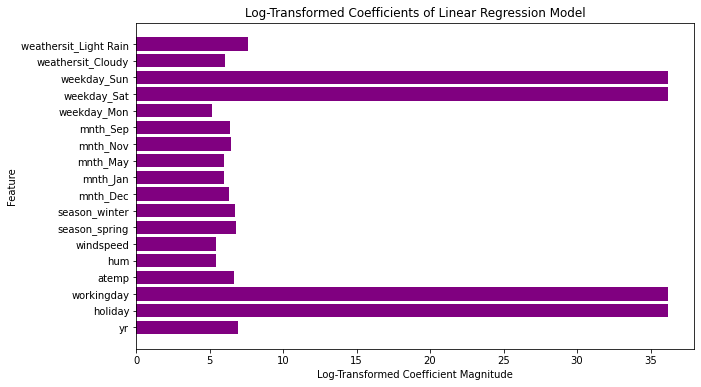

In [189]:

coefficients = model.coef_

feature_names = X_train.columns

log_coefficients = np.log(np.abs(coefficients))

# Create a bar plot for log-transformed coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, log_coefficients, color='purple')
plt.xlabel('Log-Transformed Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Log-Transformed Coefficients of Linear Regression Model')
plt.show()


## Important Features
Based on the coefficient of the independent variables above are the important variables in order of their hierarchy. 

# RESIDUAL ANALYSIS

In [192]:
y_train_pred = model.predict(X_train)

In [194]:
res = y_train - y_train_pred

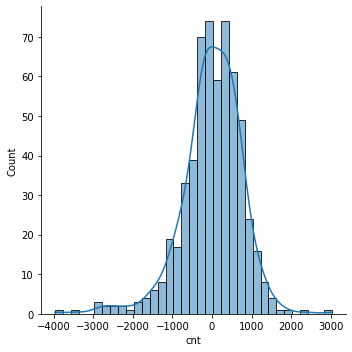

In [197]:
sns.displot(res , kde = True);

# CONSOLIDATED OBSERVATION FROM ALL MODELS

The original shape of X_train was 29 columns and the r2 score that we were able to achieve with these 29 columns was around 84.17%. However, after building 12 different models where we dropped several independent variables based on their P-values the number of independent variables were reduced to only 18 variables out of 29 and still we were able to get the r2 score of 83.76% which is in line with the the first model where we considered 29 independent variables. So we conclude that there are 18 significant variables in the dataset that can predict our target variable using multiple linear regression.